In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

## Que 1.

In [3]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.shape

(21, 2)

In [6]:
# Drop duplicated values
data_cleaned1= data.drop_duplicates()

In [7]:
data_cleaned1.shape

(21, 2)

In [8]:
# Rename the columns
data_cleaned1.columns=['Del_Time','Sort_Time']
data_cleaned1.head()

,Del_Time,Sort_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [9]:
# Checking for null values
data_cleaned1.isnull().sum()

Del_Time     0
Sort_Time    0
dtype: int64

No null values in the dataset.


### Checking for Outliers

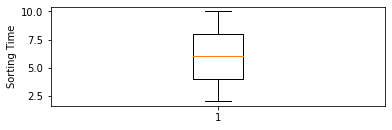

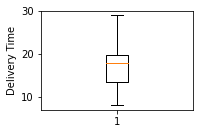

In [10]:
plt.subplot(2,1,2)
box_sort = plt.boxplot(data_cleaned1.Sort_Time)
plt.ylabel("Sorting Time")
plt.show()

plt.subplot(2,2,1)
box_del = plt.boxplot(data_cleaned1.Del_Time)
plt.ylabel("Delivery Time")
plt.show()


### No outliers detected.

In [11]:
data_cleaned1.describe()

,Del_Time,Sort_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [12]:
# Calculating the linear dependency
data_cleaned1.corr()

,Del_Time,Sort_Time
Del_Time,1.000000,0.825997
Sort_Time,0.825997,1.000000


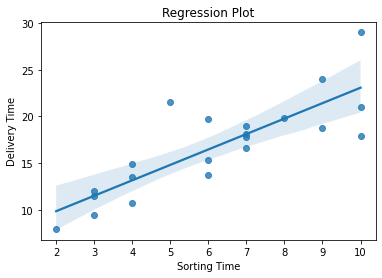

In [36]:
sns.regplot(data_cleaned1['Sort_Time'],data_cleaned1['Del_Time'])
plt.title("Regression Plot")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [14]:
model = sm.ols('Del_Time~Sort_Time',data=data_cleaned1).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Del_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.98e-06
Time:                        22:56:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sort_Time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.params

Intercept    6.582734
Sort_Time    1.649020
dtype: float64

In [17]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [18]:
print(model.pvalues, '\n' ,model.tvalues)

Intercept    0.001147
Sort_Time    0.000004
dtype: float64 
 Intercept    3.823349
Sort_Time    6.387447
dtype: float64


The regression model is,

### Delivery_Time =  6.582734 + 1.649020 * Sorting_Time

## Predict for new values of sorting time

In [55]:
new_data = pd.DataFrame({"Sort_Time":[10,5,8,15]})

In [56]:
new_data

,Sort_Time
0,10
1,5
2,8
3,15


In [59]:
Delivery_Time_pred = model.predict(new_data)
df`

0    23.072933
1    14.827833
2    19.774893
3    31.318032
dtype: float64

## Que 2.

In [22]:
salary = pd.read_csv("Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [23]:
salary.shape

(30, 2)

In [24]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [25]:
salary_1 = salary.drop_duplicates()


In [26]:
salary_1.shape

(30, 2)

In [27]:
salary_1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

No null values detected

In [28]:
salary_1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [29]:
salary_1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


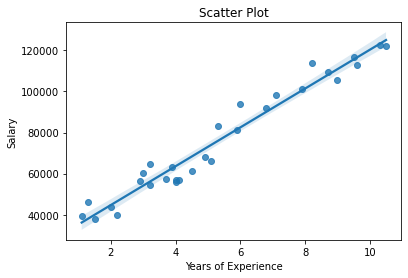

In [61]:
sns.regplot(salary_1.YearsExperience,salary_1.Salary)
plt.title("Scatter Plot")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [31]:
model_1 = sm.ols("Salary~YearsExperience",data = salary_1).fit()

In [32]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.14e-20
Time:                        22:56:47   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [34]:
model_1.rsquared, model_1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

So the regression  model is 

   ### Salary = 25792.200199 + 9449.962321 * YearsExperience